<a href="https://colab.research.google.com/github/JuanRoccia/Object-Oriented-Python-Programming/blob/main/POO_Trabajo_Final_Juan_Manuel_Roccia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><font text-align="center" color="#ff6666">SOBRE EL TRABAJO FINAL</font></h1>

 Tema: Modelado de clases e implementación de software para inmobiliaria (enunciado planteado en clase, disponible en aula virtual)

Condiciones:

- La resolución debe incluir: diagrama UML, archivo de definición de clases, archivo de prueba de funcionamiento.

- Se evalúa: la claridad de la resolución, técnicas de programación empleadas, conceptos aplicados.

<h2><font text-align="center" color=" #ff4d4d">EJEMPLO DE DESARROLLO</font></h2>
Asignatura:
<font text-align="center" color="#ff3333">Programación Orientada a Objetos</font><br>

## **Ejercicio 1**
Se debe implementar un software para gestionar la información de alquileres y ventas en una
inmobiliaria. La tarea solicitada es el modelado de las clases apropiadas teniendo en cuenta los
siguientes requisitos:
- Cualquier inmueble debe poder ser identificado de manera única.
- Cualquier inmueble debe registrar información de dirección, cantidad de ambientes, superficie
cubierta (metros cuadrados) y estado (en alquiler/ alquilado/ en venta/ vendido/ en alquiler o venta).
- En principio, la inmobiliaria trabaja sólo con casas y departamentos, pero requiere un diseño que pueda ser complementado a futuro para otros tipos de inmuebles.
- Para los departamentos, se debe agregar información de gastos de expensas, número de depto y si tiene o no cochera.
- Para las casas, se debe agregar información de superficie de patio (metros cuadrados) y si tiene o no cochera.
- Cualquier inmueble debe tener un propietario, y un propietario puede tener 0 o más inmuebles.
- La información relevante de un propietario son su nombre y apellido completos y su dni.
- Al cargar una nueva casa o departamento al sistema, se ingresa el monto solicitado por el propietario, pero la inmobiliaria define un porcentaje de ganancia que debe sumarse para obtener el precio final de alquiler o venta. Estos porcentajes se rigen por un cuadro tarifario que deben respetar
todas las inmobiliarias.

Analizar el problema y proponer un modelo para la solución, considerando además de que se podría
obtener un software para luego vender también a otras inmobiliarias.

**Extras:**
- Incorporar información de inquilino/ comprador.
- Modelar otros tipos de inmuebles (ej: quinta, salón de eventos, cabaña, etc).

# <font text-align="center" color="#ff4d4d">Diagrama UML</font>

## UML Class Diagram
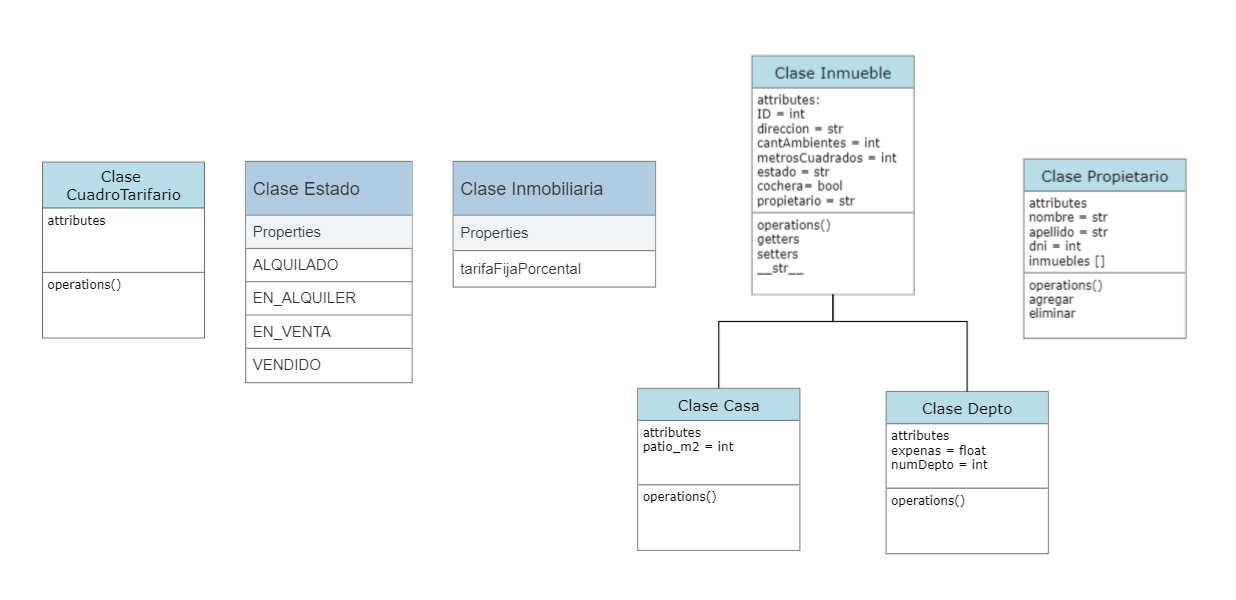

# <font text-align="center" color="#ff3333">Definición de clases</font>

In [ ]:
# Enumeración para definir los posibles valores de "estado"
from enum import Enum

# Clase del estado del inmueble para definir valores
class Estado(Enum):
    EN_ALQUILER = "En alquiler"
    ALQUILADO = "Alquilado"
    EN_VENTA = "En venta"
    VENDIDO = "Vendido"


class Inmueble:
    """docstring for Inmueble,
    El atributo cochera es heredable, por ahora,
    ya que al menos dos clases, comparten la misma característica"""

    # Variable que define el estado de un inmueble
    # estados = ("En alquiler", "En Venta", "Alquilado", "Vendido")
    # Atributos comunes a todos los inmuebles
    # En este caso, el método '__init__' recibe como argumentos el ID único del inmueble,
    # la dirección, la cantidad de ambientes, la superficie cubierta y el estado
    def __init__(
        self,
        ID,
        direccion,
        cantAmbientes,
        metrosCuadrados,
        estado,
        cochera,
        propietario,
    ):
        self._id = ID
        self._direccion = direccion
        self._ambientes = cantAmbientes
        self._superficie = metrosCuadrados
        self._estado = estado
        # self.setEstado(estado)
        self._cochera = cochera
        self._propietario = propietario

    # Método string
    def __str__(self):
        return f"ID: {self._id}\nDirección: {self._direccion}\nAmbientes: {self._ambientes}\nSuperficie: {self._superficie} m²\nEstado: {self._estado}"

    # Métodos get de Inmueble()
    def getId(self):
        return self._id

    def getDireccion(self):
        return self._direccion

    def getAmbientes(self):
        return self._cantAmbientes

    def getMetrosTotales(self):
        return self._metrosCuadradosTotales

    def getEstado(self):
        return self._estado

    def getCochera(self):
        return self._cochera

    def getPropietario(self):
        return self._propietario

    # Métodos set de Inmeble()
    def setId(self, new):
        self._id = new

    def setDireccion(self, new):
        self._direccion = new

    def setAmbientes(self, new):
        self._ambientes = new

    def setMetrosCuadrados(self, new):
        self._metrosCuadrados = new

    def setEstado(self, new):
        self._estado = new

    # def setEstado(self, new):
    #     if self.verificarEstado(new):
    #         self._estado = new
    #     else:
    #         self._estado = None

    def setCochera(self, new):
        self._cochera = new

    def setPropietario(self, new):
        self._propietario = new

    # Método para verificar el estado
    # def verificarEstado(self, posible_estado):
    #     if isinstance(posible_estado, Estado):
    #         return posible_estado in Estado
    #     else:
    #         return False

    # Método para verificar el estado
    def verificarEstado(self, posible_estado):
        try:
            if isinstance(posible_estado, Estado):
                return posible_estado in Estado.__members__.values()
            else:
                return TypeError("El estado proporcionado no es válido.")
        except TypeError as e:
            print(e)
            print(self.posiblesEstados())

    # Método para actualizar el estado
    def actualizarEstado(self):
        if self.getEstado() == Estado.EN_VENTA.value:
            self.setEstado(Estado.VENDIDO.value)
        elif self.getEstado() == Estado.EN_ALQUILER.value:
            self.setEstado(Estado.ALQUILADO.value)
        elif self.getEstado() == Estado.ALQUILADO.value:
            self.setEstado(Estado.EN_ALQUILER.value)

    # Método para obtener los posibles estados
    def posiblesEstados(self):
        return f"Estado = {Estado.EN_ALQUILER.value} o Estado = {Estado.EN_VENTA.value}\nEstado = {Estado.ALQUILADO.value} o Estado = {Estado.VENDIDO.value}"


class Departamento(Inmueble):
    """docstring for Departamento"""

    # Herencia y atributos específicos de un apartamento
    def __init__(
        self,
        ID,
        direccion,
        cantAmbientes,
        metrosCuadrados,
        estado,
        cochera,
        propietario,
        expensas,
        numDepto,
    ):
        super(Departamento, self).__init__(
            ID,
            direccion,
            cantAmbientes,
            metrosCuadrados,
            estado,
            cochera,
            propietario,
            propietario,
        )
        self._expensas = expensas
        self._numDepto = numDepto


class Casa(Inmueble):
    """docstring for Casa

    la superficie cuadrada de patio se puede considerar parte de los metros cuadrados de inmueble,
    no obstante, en caso de requerir especificamente los m2 del patio de una casa por requerimiento de la inmobiliaria,
    los metrosCuadrados siempre seran los m2 totales.
    Otra consideracion es que no es un atributo unico de las casas, asi como hay casas sin patios, tambien hay
    departamentos con patio, por lo que en todo caso deberia ser un atributo de inmueble, heredable."""

    # Herencia y atributos específicos de una casa
    def __init__(
        self,
        ID,
        direccion,
        cantAmbientes,
        metrosCuadrados,
        estado,
        cochera,
        propietario,
        patio_m2,
    ):
        super(Casa, self).__init__(
            ID, direccion, cantAmbientes, metrosCuadrados, estado, cochera, propietario
        )
        self._patio_m2 = patio_m2


class Propietario:
    """docstring for Propietario,
    Cualquier inmueble debe tener un propietario,
    y un propietario puede tener 0 o más inmuebles"""

    # Argumentos específicos de un propietario
    def __init__(self, nombre, apellido, dni):
        super(Propietario, self).__init__()
        self._nombre = nombre
        self._apellido = apellido
        self._dni = dni
        self._inmuebles = []

    def agregarInmueble(self, inmueble):
        self._inmuebles.append(inmueble)

    def eliminarInmueble(self, inmueble):
        self._inmuebles.remove(inmueble)


class Inmobiliaria:

    tarifaFijaPorcental = 0.3

    def __init__(self):
        self._listaInmuebles = []

    def setListaInmueble(self, nuevaListaInmueble):
        self._listaInmuebles = nuevaListaInmueble

    def agregarInmueble(self, nuevoInmueble):
        self._listaInmuebles.append(nuevoInmueble)

    def venderInmueble(self, cliente, ID):
        # buscamos el inmueble con el id

        # calculamos la tarifa o ganancia de la inmobiliaria
        class CuadroTarifario:
            """docstring for CuadroTarifario"""

            def __init__(self, porcentaje_ganancia):
                super(CuadroTarifario, self).__init__()
                self.porcentaje_ganancia = porcentaje_ganancia

            def calcular_precio_final(self, monto_solicitado):
                return monto_solicitado * (1 + self.porcentaje_ganancia / 100)

            def setCuadroTarifario(self, new):
                self._ = new


# <font text-align="center" color="#ff1a1a">Prueba de Funcionamiento</font>

In [ ]:
# Importo el archivo con la implementación de las clases
from clases import *

# Instancia de la clase Inmueble y sus valores asignados
inmueble = Inmueble(
    ID=12345,
    direccion="Calle Falsa 123",
    cantAmbientes=3,
    metrosCuadrados=120,
    estado=Estado.EN_ALQUILER.value,
    cochera=False,
    propietario="Menganito",
)

# Mostrar inmueble actualmente (método __str__)
print(f"{inmueble}\n")

# Una vez creada la instancia, puedo acceder a los atributos
# de la clase y modificarlos según sea necesario:

# Mostrar la direccón del inmueble
print(inmueble.getDireccion())

# Mostrar el estado actual del inmueble
print(inmueble.getEstado())

# Modificar el estado del inmueble a "Alquilado"
inmueble.setEstado(Estado.ALQUILADO.value)

# Mostrar nuevo estado
print(inmueble.getEstado())

# Mostrar el inmueble luego de la modificación
print(f"\n{inmueble}")

# =================================================================

print()
# Prueba de funcionamiento para verificar verificar si un parámetro es una instancia de la clase Estado
# El método "verificarEstado()" recibe un parámetro "posibleEstado" y realiza la siguiente comprobación:
# Si "posibleEstado" es una instancia de la clase "Estado", devuelve "True".
# Si "posibleEstado" es de otro tipo de dato, devuelve "False".

# Crea un nuevo inmueble con estado "En alquiler"
inmueble2 = Inmueble(
    67899,
    "Dirección del inmueble 45",
    3,
    120,
    Estado.EN_ALQUILER.value,
    cochera=False,
    propietario="Fulanito",
)


# Verifica si el estado "En venta" es válido para el inmueble
print(inmueble2.verificarEstado(Estado.EN_VENTA))
# Verifica si el estado "En alquiler" es válido para el inmueble
print(inmueble2.verificarEstado(Estado.EN_ALQUILER))
# Verifica si el estado "Alquilado" es válido para el inmueble
print(inmueble2.verificarEstado(Estado.ALQUILADO))
# Verifica si el estado "Vendido" es válido para el inmueble
print(inmueble2.verificarEstado(Estado.VENDIDO))
# Verifica si el estado "[]" es válido para el inmueble
parametro_invalido = []
print(inmueble2.verificarEstado(parametro_invalido))

print()
# Prueba de funcionamiento para actualizar el estado del inmueble al siguiente estado válido en el ciclo:
# "En alquiler" -> "Alquilado" -> "En alquiler" O "En venta" -> "Vendido" -> "En venta"
# Por ejemplo, si el inmueble se encuentra en estado "En alquiler", al actualizarEstado() el inmueble cambia a "Alquilado".

# EN_ALQUILER:
# Muestra el estado actual
print(inmueble2.getEstado())  # Imprime "En alquiler"
# Actualiza el estado del inmueble
inmueble2.actualizarEstado()
# Imprime el estado actual
print(inmueble2.getEstado())  # Imprime "Alquilado"
# Actualiza el estado del inmueble
inmueble2.actualizarEstado()
# Imprime el estado actual
print(inmueble2.getEstado())  # Imprime "En alquiler"

print()
# Modificar el estado del inmueble a "En venta"
inmueble2.setEstado(Estado.EN_VENTA.value)
# EN_VENTA:
# Muestra el estado actual
print(inmueble2.getEstado())  # Imprime "En venta"
# Actualiza el estado del inmueble
inmueble2.actualizarEstado()
# Imprime el estado actual
print(inmueble2.getEstado())  # Imprime "Vendido"
# Actualiza el estado del inmueble
inmueble2.actualizarEstado()
# Imprime el estado actual
print(inmueble2.getEstado())  # Imprime "Vendido"

# Una vez que esta vendido, no se puede volver a poner en venta
# y sino habría que implementar en la funcion actualizarEstado:
# if self.getEstado() == Estado.VENDIDO.value:
# 	self.setEstado(Estado.EN_VENTA.value)

print()
# Imprime la información sobre los posibles estados del inmueble
print(
    inmueble2.posiblesEstados()
)  # Imprime "Estado = En alquiler o Estado = En venta\nEstado = En venta o estado = En Vendido"

# =================================================================

print()
# Manejo de errores en el estado:

inmueble3 = Inmueble(
    ID=54321,
    direccion="Av Siempreviva 23",
    cantAmbientes=3,
    metrosCuadrados=120,
    estado=Estado.EN_VENTA.value,
    cochera=True,
    propietario="Homero",
)

print(inmueble3.verificarEstado(Estado.VENDIDO))
# Verifica si el estado "[]" es válido para el inmueble
parametro_invalido = []
resultado = inmueble3.verificarEstado(parametro_invalido)
print(resultado)
print()

try:
    if inmueble3.verificarEstado(parametro_invalido) == True:
        # Verifica si el estado "En alquiler" es válido para el inmueble
        if inmueble3.getEstado() == Estado.EN_ALQUILER.value:
            # El inmueble está en alquiler
            print("El inmueble está en alquiler")
        else:
            # El inmueble no está en alquiler
            print("El inmueble no está en alquiler")
        # Verifica si el estado "En venta" es válido para el inmueble
        if inmueble3.getEstado() == Estado.EN_VENTA.value:
            # El inmueble está en venta
            print("El inmueble está en venta")
        else:
            # El inmueble no está en venta
            print("El inmueble no está en venta")
        # Verifica si el estado "Alquilado" es válido para el inmueble
        if inmueble3.getEstado() == Estado.ALQUILADO.value:
            # EL inmueble está alquilado
            print("El inmueble está alquilado")
        else:
            # El inmueble no está alquilado
            print("El inmueble no está alquilado")
        # Verifica si el estado "Vendido" es válido para el inmueble
        if inmueble3.getEstado() == Estado.VENDIDO.value:
            # El inmueble esta vendido
            print("El inmueble está vendido")
        else:
            # El inmueble no esta vendido
            print("El inmueble no está vendido")
    else:
        raise TypeError
        print(inmueble3.verificarEstado(parametro_invalido))
    # Si el posible estado proporcionado no es válido para el inmueble
except TypeError:
    print("El estado proporcionado no es válido. Los estados válidos son:")
    print(inmueble3.posiblesEstados())
except ValueError:
    print("Se ha producido un error de tipo ValueError")
except:
    print("Se ha producido un error inesperado")
print()

try:
    if inmueble3.verificarEstado(Estado.EN_VENTA) == True:
        # Verifica si el estado "En alquiler" es válido para el inmueble
        if inmueble3.getEstado() == "En alquiler":
            # El inmueble está en alquiler
            print("El inmueble está en alquiler")
        else:
            # El inmueble no está en alquiler
            print("El inmueble no está en alquiler")
        # Verifica si el estado "En venta" es válido para el inmueble
        if inmueble3.getEstado() == "En venta":
            # El inmueble está en venta
            print("El inmueble está en venta")
        else:
            # El inmueble no está en venta
            print("El inmueble no está en venta")
        # Verifica si el estado "Alquilado" es válido para el inmueble
        if inmueble3.getEstado() == "Alquilado":
            # EL inmueble está alquilado
            print("El inmueble está alquilado")
        else:
            # El inmueble no está alquilado
            print("El inmueble no está alquilado")
        # Verifica si el estado "Vendido" es válido para el inmueble
        if inmueble3.getEstado() == "Vendido":
            # El inmueble esta vendido
            print("El inmueble está vendido")
        else:
            # El inmueble no esta vendido
            print("El inmueble no está vendido")
    else:
        raise TypeError
        print(inmueble3.verificarEstado(parametro_invalido))
    # Si el posible estado proporcionado no es válido para el inmueble
except TypeError:
    print("El estado proporcionado no es válido. Los estados válidos son:")
    print(inmueble3.posiblesEstados())
except ValueError:
    print("Se ha producido un error de tipo ValueError")
except:
    print("Se ha producido un error inesperado")

# =================================================================
print()

# Prueba de la clase Propietario
propietario1 = Propietario("Juan", "Pérez", "123456")

# Creación de inmuebles
inmueble4 = Inmueble(
    ID=12345,
    direccion="Av Siempreviva 123",
    cantAmbientes=2,
    metrosCuadrados=80,
    estado=Estado.EN_ALQUILER.value,
    cochera=True,
    propietario=propietario1,
)

inmueble5 = Inmueble(
    ID=23456,
    direccion="Av Siempreviva 234",
    cantAmbientes=3,
    metrosCuadrados=80,
    estado=Estado.EN_ALQUILER.value,
    cochera=True,
    propietario=propietario1,
)
# Agregar inmuebles al propietario
propietario1.agregarInmueble(inmueble4)
propietario1.agregarInmueble(inmueble5)

# Eliminar inmueble del propietario
propietario1.eliminarInmueble(inmueble5)

# Verificar que el propietario sólo tiene un inmueble
print(
    f"El propietario {propietario1._nombre} {propietario1._apellido} tiene {len(propietario1._inmuebles)} inmueble/s"
)

# =================================================================

# Prueba de funcionamiento inmobiliaria

# Creación de una inmobiliaria
inmobiliaria1 = Inmobiliaria()

# Creación de un cliente
cliente1 = Propietario("Juan", "Pérez", 123456)

# Creación de inmuebles
inmueble6 = Inmueble(
    ID=12345,
    direccion="Av Siempreviva 123",
    cantAmbientes=2,
    metrosCuadrados=80,
    estado=Estado.EN_VENTA.value,
    cochera=True,
    propietario=propietario1,
)
inmueble7 = Inmueble(
    ID=23456,
    direccion="Av Siempreviva 234",
    cantAmbientes=3,
    metrosCuadrados=80,
    estado=Estado.EN_VENTA.value,
    cochera=True,
    propietario=propietario1,
)

# Agregar inmuebles a la lista de inmuebles de la inmobiliaria
inmobiliaria1.agregarInmueble(inmueble6)
inmobiliaria1.agregarInmueble(inmueble7)

# # Establecer el cuadro tarifario de la inmobiliaria
# inmobiliaria1.setCuadroTarifario(CuadroTarifario(30))

# # Establecer el cuadro tarifario de la inmobiliaria
# cuadro_tarifario = CuadroTarifario(30)
# inmobiliaria1.setCuadroTarifario(cuadro_tarifario)

# Vender un inmueble a un cliente
inmobiliaria1.venderInmueble(cliente1, 12345)

# Verificar que el inmueble ha sido vendido y que el monto final incluye la tarifa de la inmobiliaria
if inmueble6.getEstado() == Estado.VENDIDO.value:
    print("El inmueble ha sido vendido")
else:
    print("El inmueble no ha sido vendido")

# precio_final = inmueble6.getPrecioFinal()
# tarifa_inmobiliaria = inmobiliaria1.getCuadroTarifario().calcular_precio_final(
#     inmueble1.getMontoSolicitado()
# )
# if precio_final == tarifa_inmobiliaria:
#     print("El precio final incluye la tarifa de la inmobiliaria")
# else:
#     print("El precio final no incluye la tarifa de la inmobiliaria")


# <font text-align="center" color="#ff0000">Conceptos Aplicados<font>

En el código de Definicion de clases se aplican los siguientes conceptos de **programación orientada a objetos:**

1. **Herencia:** la clase Inmueble hereda el atributo cochera de al menos dos clases que comparten la misma característica.
2. **Encapsulación:** los atributos de la clase Inmueble están protegidos con el prefijo "_" y se acceden a ellos a través de métodos get y set.
3. **Polimorfismo:** el método verificarEstado tiene una implementación diferente según el tipo de argumento que recibe. Si recibe un objeto de la clase Estado, verifica que sea uno de los posibles valores del enumerado, y en caso contrario, devuelve False. Si recibe cualquier otro tipo de argumento, lanza una excepción.
4. **Enumeración:** se utiliza la enumeración Estado para definir los posibles valores del atributo estado de la clase Inmueble.
5. **Métodos mágicos:** se utiliza el método __init__ para inicializar los atributos de la clase y el método __str__ para definir la representación en forma de cadena de caracteres de un objeto de la clase.

En el código de Prueba de funcionamiento se aplican los siguientes conceptos de **programación orientada a objetos:**

1. **Instanciación:** se crea una instancia de la clase Inmueble con el operador inmueble = Inmueble(...).
2. **Encapsulación:** se accede a los atributos y métodos de la clase Inmueble a través de la instancia creada y se utilizan los métodos get y set para obtener y modificar los valores de los atributos respectivamente.
3. **Polimorfismo:** se utiliza el método verificarEstado de la clase Inmueble con diferentes tipos de argumentos para verificar si son válidos para el atributo estado. Si el argumento es una instancia de la clase Estado, devuelve True si es uno de los posibles valores del enumerado y False en caso contrario. Si el argumento es de otro tipo de dato, lanza una excepción.
4. **Métodos de clase:** se utiliza el método actualizarEstado de la clase Inmueble para modificar el atributo estado según un ciclo predefinido. Este método es un método de clase, ya que se invoca a través de la clase y no de una instancia de la misma.
5. **Excepciones:** se utiliza el bloque try-except para manejar excepciones que pueden ocurrir al invocar el método verificarEstado con argumentos de tipos de datos no soportados.

Conceptos generales:

1. **Clases:** se define la clase Inmueble y se utilizan atributos y métodos para representar y manipular los datos de un inmueble.
2. **Métodos:** se definen diferentes métodos para obtener y modificar los atributos de la clase, así como para verificar el estado de un inmueble y para obtener una representación en forma de cadena de caracteres de un objeto de la clase.
3. **Atributos:** se definen diferentes atributos para representar las características de un inmueble, como su identificación única, dirección, cantidad de ambientes, superficie cubierta, estado, presencia de cochera y propietario.
4. **Constructor:** El método init es el constructor de la clase. Se ejecuta cuando se crea una nueva instancia de la clase. En este caso, el constructor recibe varios argumentos y los almacena en los atributos de la instancia.
5. **Docstrings:** Cadena de caracteres que se encuentra al principio de una clase, método o función y proporciona información sobre la implementación y el propósito de dicha clase, método o función. En este caso, podemos identificar distintas cadenas de documentacón por todo el código.
6. **Importación de módulos:** se importa el archivo clases.py con from clases import *.
7. **Funciones:** se utilizan las funciones print y f para mostrar información por pantalla.
8. **Operadores:** se utiliza el operador de asignación = para asignar valores a variables y atributos.
9. **Condicionales:** se utiliza el operador if para verificar si una expresión es cierta o falsa y ejecutar ciertas acciones en consecuencia.
10. **Ciclos:** se utiliza el bucle for para iterar sobre una secuencia de elementos.
11. **Cadenas de formato:** se utilizan las cadenas de formato f para incluir variables y expresiones en una cadena de caracteres y darle un formato específico.